# `20180226a` Testing versions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

bad


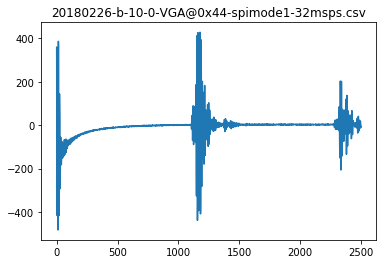

second


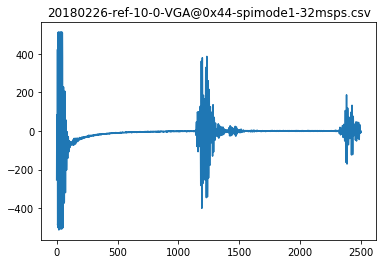

second


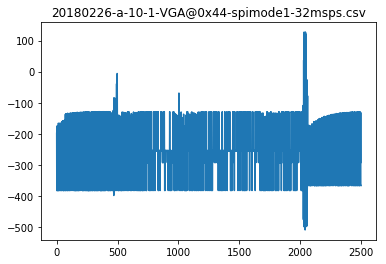

second


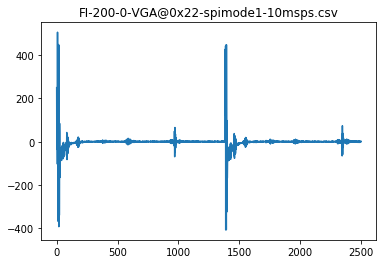

bad


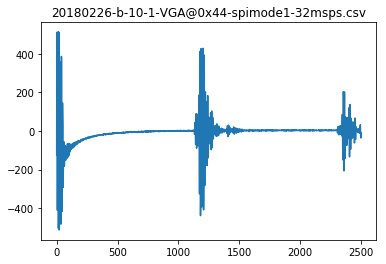

bad


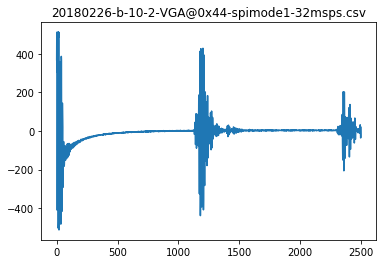

In [53]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("*.csv"):
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[3]/128):
        print "bad"
        for i in range(len(A)/2-1):
            if "ref" in CSVFile or "0x22" in CSVFile:
                value = 256*(A[2*i]&0b11) + A[2*i+1] - 512
                IDLine.append((A[2*i+1]&0b11110000)/16)  
                tmp.append( value ) 
            else:
                value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
                IDLine.append((A[2*i+1]&0b11110000)/16)  
                tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            if "ref" in CSVFile or "0x22" in CSVFile:
                value = 256*(A[2*i+1]&0b11) + A[2*i+0] - 512
                IDLine.append((A[2*i]&0b11110000)/16) 
                tmp.append( value )
            else:
                value = 128*(A[2*i+0]&0b111) + A[2*i+1] - 512
                IDLine.append((A[2*i]&0b11110000)/16) 
                tmp.append( value )               
    plt.plot(tmp[0:2500])
    plt.title(CSVFile)
    plt.show()
    AA.append(tmp)
    
    t = [ 1.0*x/32 for x in range(len(tmp))]



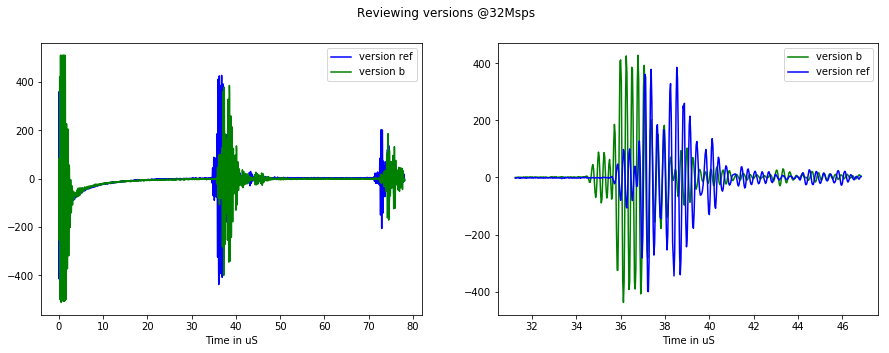

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(t[0:2500],AA[0][0:2500],"b",label="version ref")
ax1.plot(t[0:2500],AA[1][0:2500],"g",label="version b")
ax1.set_xlabel("Time in uS")
ax2.plot(t[1000:1500],AA[0][1000:1500],"g",label="version b")
ax2.plot(t[1000:1500],AA[1][1000:1500],"b",label="version ref")
ax2.legend()
ax2.set_xlabel("Time in uS")
ax1.set_xlabel("Time in uS")
ax1.legend()

plt.suptitle('Reviewing versions @32Msps')
plt.savefig("compare_version.jpg", bbox_inches='tight')
plt.show()